In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")

Bu kod satırında, pandas kütüphanesini kullanarak star_classification.csv adlı CSV dosyasını okuyorum. Dosya, /kaggle/input/stellar-classification-dataset-sdss17/ yolunda bulunuyor. pd.read_csv fonksiyonu, CSV dosyasındaki verileri bir DataFrame olarak yüklememi sağlıyor. Bu DataFrame, üzerinde veri analizi ve işleme yapabileceğim bir tablo şeklinde olacak.

In [3]:
import matplotlib.pyplot as plt

**EXPLORATORY DATA ANALYSIS**

In [4]:
print(dataset)

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

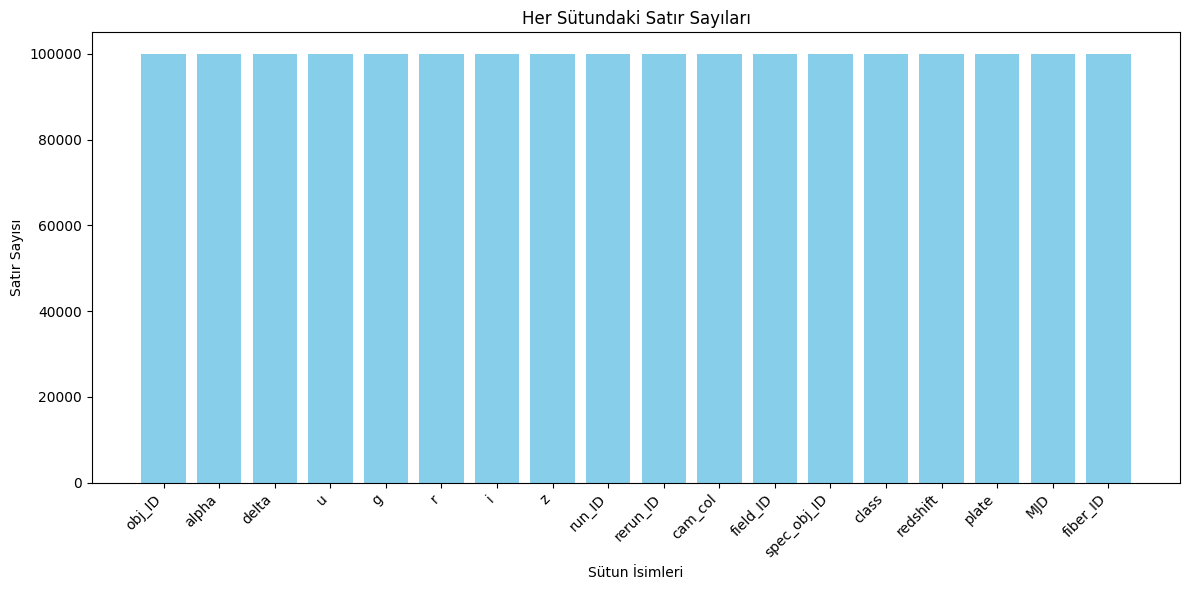

In [5]:

# Sütun adlarını ve her sütundaki satır sayısını al
sutun_adlari = dataset.columns
satir_sayilari = dataset.count()  # Her sütundaki geçerli (non-NaN) satır sayısı

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.bar(sutun_adlari, satir_sayilari, color='skyblue')

# Grafiğe başlık ve etiket ekleme
plt.title('Her Sütundaki Satır Sayıları')
plt.xlabel('Sütun İsimleri')
plt.ylabel('Satır Sayısı')

# X eksenindeki etiketlerin okunabilirliğini artırma
plt.xticks(rotation=45, ha='right')

# Grafiği göster
plt.tight_layout()
plt.show()


Bu kodda, veri setimdeki her sütunun adlarını `sutun_adlari` değişkenine atıyorum ve her sütundaki geçerli satır sayısını `satir_sayilari` değişkenine alıyorum. Daha sonra `matplotlib` kütüphanesini kullanarak bu bilgileri bar grafiği şeklinde görselleştiriyorum. Grafik, sütun adlarını X ekseninde ve satır sayılarını Y ekseninde gösteriyor. Grafiğe başlık, eksen etiketleri ekliyorum ve X eksenindeki etiketlerin okunabilirliğini artırmak için etiketleri 45 derece döndürüyorum. Son olarak, grafiği gösteriyorum.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

**VERİ ÖN İŞLEME**

In [7]:
dataset.rename(columns={"class": "Class"}, inplace=True)

Bu kodda, veri setindeki class adlı sütunun adını Class olarak değiştiriyorum. rename fonksiyonunu kullanarak sütun adını güncelliyorum ve inplace=True parametresi ile bu değişikliğin veri setinde kalıcı olmasını sağlıyorum. Bu, veri setindeki class bir anahtar kelime olduğu için sorun çıkarmaması adına Class olarak değiştiriyorum.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  Class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
XSample=dataset.drop(["Class","obj_ID", "run_ID", "rerun_ID", "field_ID","spec_obj_ID","plate","MJD","fiber_ID"],axis=1)
ySample=dataset.Class
XSample=pd.DataFrame(XSample)

Bu kodda, veri setimdeki belirli sütunları (Class, obj_ID, run_ID, rerun_ID, field_ID, spec_obj_ID, plate, MJD, fiber_ID) drop fonksiyonunu kullanarak XSample adlı yeni bir DataFrame oluşturmak üzere çıkarıyorum. Bu sütunlar, modelleme sürecinde kullanılmayacak veya hedef değişken olarak değerlendirilmeyecek sütunlar çünkü outputu etkilemeyecek olan idler. Class sütununu ise ySample olarak ayırıyorum; bu sütun etiketleri içeriyor. Son olarak, XSample DataFrame'ini tekrar pd.DataFrame olarak dönüştürüyorum, bu işlem veri formatının tutarlı olmasını sağlıyor.

In [10]:
XSample.corr()

,alpha,delta,u,g,r,i,z,cam_col,redshift
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.019582,0.001667
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.032565,0.031638
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.003548,0.014309
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.003508,0.022954
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.008480,0.433241
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.007615,0.492383
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.003365,0.030380
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,1.000000,0.000097
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.000097,1.000000


Bu kodda, XSample veri setindeki tüm özellikler arasındaki korelasyonları hesaplıyorum. corr fonksiyonu, veri setindeki her bir sütun çiftinin Pearson korelasyon katsayısını döndürüyor. Bu katsayılar, iki sütun arasındaki doğrusal ilişkinin gücünü ve yönünü gösterir. Korelasyon matrisini inceleyerek, özellikler arasındaki ilişkileri ve olası bağıntıları anlayabilirim böylece 1'e yakın değerli olan sütunlardan bir tanesini çıkarıp doğruluk oranını arttırabiliyorum.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
XSample = scaler.fit_transform(XSample)

Bu kodda, StandardScaler sınıfını kullanarak XSample veri setindeki özellikleri ölçeklendiriyorum. StandardScaler, her bir özelliği ortalaması 0 ve standart sapması 1 olan bir dağılıma dönüştürür. Bu, veri setindeki farklı ölçeklerdeki özellikleri normalize ederek modelleme sürecinde daha iyi sonuçlar elde etmeme yardımcı olur. fit_transform fonksiyonu, verileri standartlaştırmak için scaler'ı öğrenir ve dönüştürür.

In [12]:
dataset['Class'].value_counts()

Class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

ySample=le.fit_transform(ySample)

Bu kodda, LabelEncoder sınıfını kullanarak ySample içindeki etiketleri sayısal değerlere dönüştürüyorum. LabelEncoder, sınıflandırma problemlerinde kullanılan kategorik etiketleri sayısal formata çevirir. fit_transform fonksiyonu, etiketleri öğrenir ve dönüştürür. Bu dönüşüm, makine öğrenmesi algoritmalarının kategorik verilerle çalışabilmesi için gereklidir.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(XSample,ySample,test_size=0.20,random_state=10) #yüzde20luk kısmını test için ayırdık

print(XSample.shape)
print(XTrain.shape)
print(XTest.shape)

(100000, 9)
(80000, 9)
(20000, 9)


Bu kodda, train_test_split fonksiyonunu kullanarak XSample ve ySample veri setlerini eğitim (XTrain, yTrain) ve test (XTest, yTest) setlerine ayırıyorum. test_size=0.20 parametresi ile veri setinin %20'sini test seti olarak ayırıyorum. random_state=10 ise bölme işleminin tekrarlanabilir olmasını sağlıyor. Son olarak, XSample, XTrain ve XTest veri setlerinin şekillerini yazdırarak veri setlerindeki örnek sayısını kontrol ediyorum.

**ALGORİTMA SEÇİMİ VE HİPERPARAMETRE OPTİMİZASYONU**
**VE MODEL DEĞERLENDİRME**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11782
           1       0.96      0.93      0.95      3854
           2       0.99      1.00      1.00      4364

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



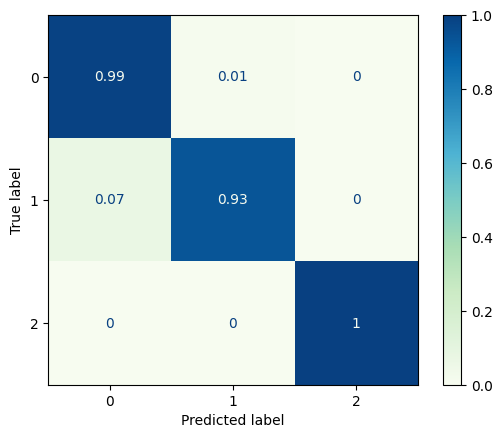

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#RandomForestClassifier modelini oluştur
model = RandomForestClassifier(n_estimators=100,random_state=21) # estimators kaç tane decision tree olmasını söyler

#model eğitim verilerini eğit
model.fit(XTrain, yTrain)
yTestPred=model.predict(XTest)

print(classification_report(yTest,yTestPred))  #VEYA print(classification_report(yVal,y_test_pred))

cm=metrics.confusion_matrix(yTest,yTestPred,normalize="true").round(2)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp=disp.plot(cmap=plt.cm.GnBu, values_format="g") 
plt.show()

Bu kodda, RandomForestClassifier sınıfını kullanarak bir Random Forest modelini oluşturuyorum. n_estimators=100 parametresi, modelde kullanılacak karar ağaçlarının sayısını belirtir ve random_state=21 parametresi ise modelin tekrar edilebilirliğini sağlar.

Modeli XTrain ve yTrain verileri ile eğitiyorum. Eğitimden sonra, XTest veri setini kullanarak tahminlerde bulunuyorum ve yTestPred değişkeninde bu tahminleri saklıyorum. classification_report fonksiyonunu kullanarak, modelin doğruluk, hassasiyet, geri çağırma ve F1 skoru gibi performans metriklerini yazdırıyorum ve 0.98 gibi yüksek biir F1 değeri elde ediyorum.

Son olarak, metrics.confusion_matrix fonksiyonu ile bir karışıklık matrisini hesaplıyorum ve normalize="true" parametresi ile normalizasyon yapıyorum. ConfusionMatrixDisplay kullanarak karışıklık matrisini görselleştiriyorum ve plt.show() ile grafiği gösteriyorum.

**UNSUPERVISED**

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
import warnings
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(XSample)


print("Adjusted Rand Index:", adjusted_rand_score(ySample, kmeans.labels_))
print("Homojenlik Skoru:", homogeneity_score(ySample, kmeans.labels_))
print("Completentlik Skoru:", completeness_score(ySample, kmeans.labels_))
print("V-Measure Skoru:", v_measure_score(ySample, kmeans.labels_))

Adjusted Rand Index: 1.560251358220553e-05
Homojenlik Skoru: 1.604244443676225e-05
Completentlik Skoru: 0.12249521179003663
V-Measure Skoru: 3.208068746321139e-05


Önce, KMeans algoritmasını ve bazı performans metriklerini kullanmak için gerekli araçları programıma ekliyorum. Ayrıca, herhangi bir uyarının görünmesini istemiyorum.

Sonra, iki farklı küme oluşturacak şekilde bir KMeans modeli oluşturuyorum. Bu model, aynı türden olan verileri bir araya getirmeye çalışacak. Modeli verilerimle eğitiyorum, yani modelin verilerdeki desenleri öğrenmesini sağlıyorum.

Eğitim tamamlandıktan sonra, modelin tahmin ettiği kümeleri gerçek etiketlerle karşılaştırarak performansını değerlendiriyorum. Bu değerlendirmeyi yaparken, modelin ne kadar doğru kümeleme yaptığını anlamak için dört farklı metrik kullanıyorum. Sonuçlar pek iç açısı değil o yüzden elbow yöntemi ile en iyi kime sayısını bulmayaca çalışacağım.

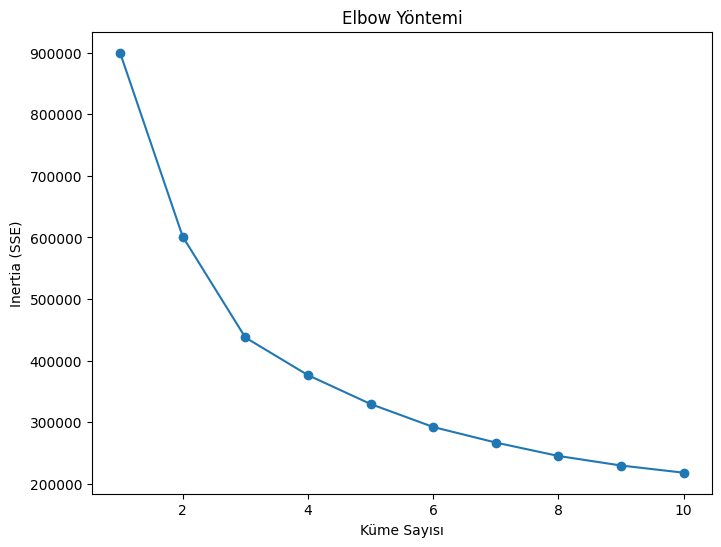

In [18]:
# Elbow Yöntemi
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(XSample)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Yöntemi')
plt.show()



KMeans algoritmasını test etmek için bir döngü kuruyorum. Bu döngüde, 1'den 10'a kadar olan küme sayıları için KMeans modelini oluşturup veriler üzerinde eğitiyorum. Her iterasyonda, modelin "inertia" değerini (toplam hata karelerinin toplamı) hesaplıyorum ve bu değerleri bir listeye ekliyorum.

Inertia, küme merkezlerinin verilerden ne kadar uzak olduğunu gösterir ve genellikle küme sayısını belirlemek için kullanılır. Küme sayısı arttıkça inertia değeri azalır çünkü daha fazla küme ile veriler daha iyi ayrılır. Ancak, bu azalma belli bir noktadan sonra yavaşlar ve grafikte bu nokta "dirsek" olarak adlandırılır. Dirsek olarak 3 noktasını seçmem lazım seçiyorum, metrik değerlerimde artış oluyor ama yeteri kadar değil o yüzden küme sayısını 500 olarak seçiyorum.

In [19]:
kmeans = KMeans(n_clusters=500, random_state=42)
kmeans.fit(XSample)


print("Adjusted Rand Index:", adjusted_rand_score(ySample, kmeans.labels_))
print("Homojenlik Skoru:", homogeneity_score(ySample, kmeans.labels_))
print("Completentlik Skoru:", completeness_score(ySample, kmeans.labels_))
print("V-Measure Skoru:", v_measure_score(ySample, kmeans.labels_))

Adjusted Rand Index: 0.0032270257680524156
Homojenlik Skoru: 0.5410088456533582
Completentlik Skoru: 0.08452075229081206
V-Measure Skoru: 0.1462008345596681


Sonuç olarak metrik değerlerimi son olarak bu kadar yükseltebildim. Küme sayısını bulmadan önce verilerimde küçültme ve eksiltme işlemleri gerçekleştirmiştim.